- Exploratory Data Analysis (EDA) - understanding the data and the underlying interactions between the different variables
- Data Pre-processing - preparing the data for modelling
- Building the model
- Evaluating the performance of the model, and possibly fine-tune and tweak it if necessary

The goal of the model is to predict whether a passenger survived the Titanic disaster, given their age, class and a few other features.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- PassengerId - this is a just a generated Id
- Pclass - which class did the passenger ride - first, second or third
- Name - self explanatory
- Sex - male or female
- Age
- SibSp - were the passenger's spouse or siblings with them on the ship
- Parch - were the passenger's parents or children with them on the ship
- Ticket - ticket number
- Fare - ticker price
- Cabin
- Embarked - port of embarkation
- Survived - did the passenger survive the sinking of the Titanic?

The whole goal is building a model that would predict the survival probability of a person, given their basic features.

### Exploratory Data Analysis (EDA)

In [4]:
print('Total number of passangers in the training data...', len(titanic))
print('Number of passangers in the training data who survived...', len(titanic[titanic['Survived'] == 1]))

Total number of passangers in the training data... 891
Number of passangers in the training data who survived... 342


In [5]:
print('% of men who survived', 100*np.mean(titanic['Survived'][titanic['Sex'] == 'male']))
print('% of women who survived', 100*np.mean(titanic['Survived'][titanic['Sex'] == 'female']))

% of men who survived 18.890814558058924
% of women who survived 74.20382165605095


In [6]:
print('% of children who survived', 100*np.mean(titanic['Survived'][titanic['Age'] < 18]))
print('% of adults who survived', 100*np.mean(titanic['Survived'][titanic['Age'] > 18]))

% of children who survived 53.98230088495575
% of adults who survived 38.26086956521739


### Data Pre-processing

#### Non numeric features to numeric

We are going to use a decision tree model. The model requires only numeric values, but one of our features is categorical: "female" or "male". this can easily be fixed by encoding this feature: "male" = 1, "female" = 0

In [7]:
titanic['Sex'] = titanic['Sex'].apply(lambda x: 1 if x == 'male' else 0)

"""
Understanding lambda functtion:
The lambda function above is same as the user defined function below:

def fun(x):
if x == 'male':
return 1
else:
return 0

- x is the argument in both user defined function and lambda function (i.e. def func(x): is same as lambda x:)
- if x == 'male':
return 1

of user defined function is same as

1 if x == 'male' of lambda function

The only difference here is - in lambda function the first return statement is placed before the condition and no 'return'
keyword is used.

- After if statement the else part is similar in both cases the only difference is no 'return' keyword used.
[return keyword is not used in lambda function][lambda function is used only for small set of statements]

A youtube video on lambda function: https://www.youtube.com/watch?v=hYzwCsKGRrg

"""

"\nUnderstanding lambda functtion:\nThe lambda function above is same as the user defined function below:\n\ndef fun(x):\nif x == 'male':\nreturn 1\nelse:\nreturn 0\n\n- x is the argument in both user defined function and lambda function (i.e. def func(x): is same as lambda x:)\n- if x == 'male':\nreturn 1\n\nof user defined function is same as\n\n1 if x == 'male' of lambda function\n\nThe only difference here is - in lambda function the first return statement is placed before the condition and no 'return'\nkeyword is used.\n\n- After if statement the else part is similar in both cases the only difference is no 'return' keyword used.\n[return keyword is not used in lambda function][lambda function is used only for small set of statements]\n\nA youtube video on lambda function: https://www.youtube.com/watch?v=hYzwCsKGRrg\n\n"

The "apply" means "do that for each value in the column". the statement in the brackets should be read as following :"for every value in the column ("lambda x:") if it's a male then replace with 1, otherwise replace with 0

#### Missing Values

 a good replacement value would be something that doesn't affect the data too much, such as the median or mean. the "fillna" function replaces every NaN (not a number) entry with the given input (the mean of the column in our case):

In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanic['Age'] = titanic['Age'].fillna(np.mean(titanic['Age']))

In [10]:
# Looking at frequency of each values in 'Embarked'
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Filling missing values of a categorical variable with mode. The below mentioned mentioned code is not an ideal way to fill missing values of categorical, we shall explain best practices in future sessions!



In [11]:
# We can use fillna() function to fill the missing values as discussed in the pandas session / notebook.
titanic.Embarked.fillna(value='S', axis = 0, inplace = True) #rowwise input

In [12]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### Omit irrelevant columns
Let us only take the columns we find relevant. ID columns are never relevant (or at least should not be, if the data was sampled randomly). As our model is very simple, let us also omit the Ticket number, Cabin, ID and Name although more sophisticated models can definitely take advantage of them


In [13]:
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

#### Separating input variables (X) and target variable (y)

In [14]:
X = titanic.drop('Survived', axis = 1)
y = titanic['Survived']

### Train and Test Split

We have our training data, and we have our test data. but in order to evaluate our model we need to split the training dataset into a train dataset and an evaluation dataset (validation). The validation data would be used to evaluate the model, while the training data would be used to train the data.

To do that, we can use the function "train_test_split" from the sklearn module. the sklean module is probably the most commonly used library in most simple machine learning tasks (this does not include deep learning where other libraries can be more popular)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Building ML Model


First, we need to import our model - A decision tree classifier (again, using the sklearn library).

Then we would feed the model both with the data (X_train) and the answers for that data (y_train)

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

The training happens in the third line (the "fit" function). During the training, the algorithm is trying to build the optimal decision tree. The way it works is very similar to the game "21 Questions". In the game we always start with general questions that give the best partition of the data ("is the character you are thinking of a male? are them alive?" etc.). It tries to acheive the best score on the training data - that is, building a model that would predict the survival outcome of as many passengers as possible.

### Evaluate the model

Now we have a model. Let's evaulate it with using the accuracy_score function. This output of the function is the number of right answers (passengers survival/death was predicted correctly) divided by the total number of passengers

In [17]:
from sklearn.metrics import accuracy_score

print('Training accuracy...', accuracy_score(y_train, model.predict(X_train)))
print('Test accuracy', accuracy_score(y_test, model.predict(X_test)))

Training accuracy... 0.9798657718120806
Test accuracy 0.7491525423728813


The accuracy function compares between the actual results (our ground truth - y_train or y_test) with the prediction of the model (given by "classifier.predict(X_train)" or "classifier.predict(X_test)" respectrively.

The large difference between the training score and the validation score suggets that our model overfits. That is, instead of leraning general rules that can be applied on unseen data, it does something that is more similar to memorize the training data. So our model performs really well on the training data (98% accuracy) but not remotely as well on the validation data.

It is clear once we plot the tree. the next bulk of code would not be explained and can be regarded as a useful magic that plots decision trees.

In [18]:
from sklearn.tree import export_graphviz
import graphviz

In [19]:
dot_data= export_graphviz(model, out_file=None,
feature_names=X_test.columns,
class_names=['0', '1'],
filled=True, rounded=True,
special_characters=True)

In [20]:
graph1=graphviz.Source(dot_data)

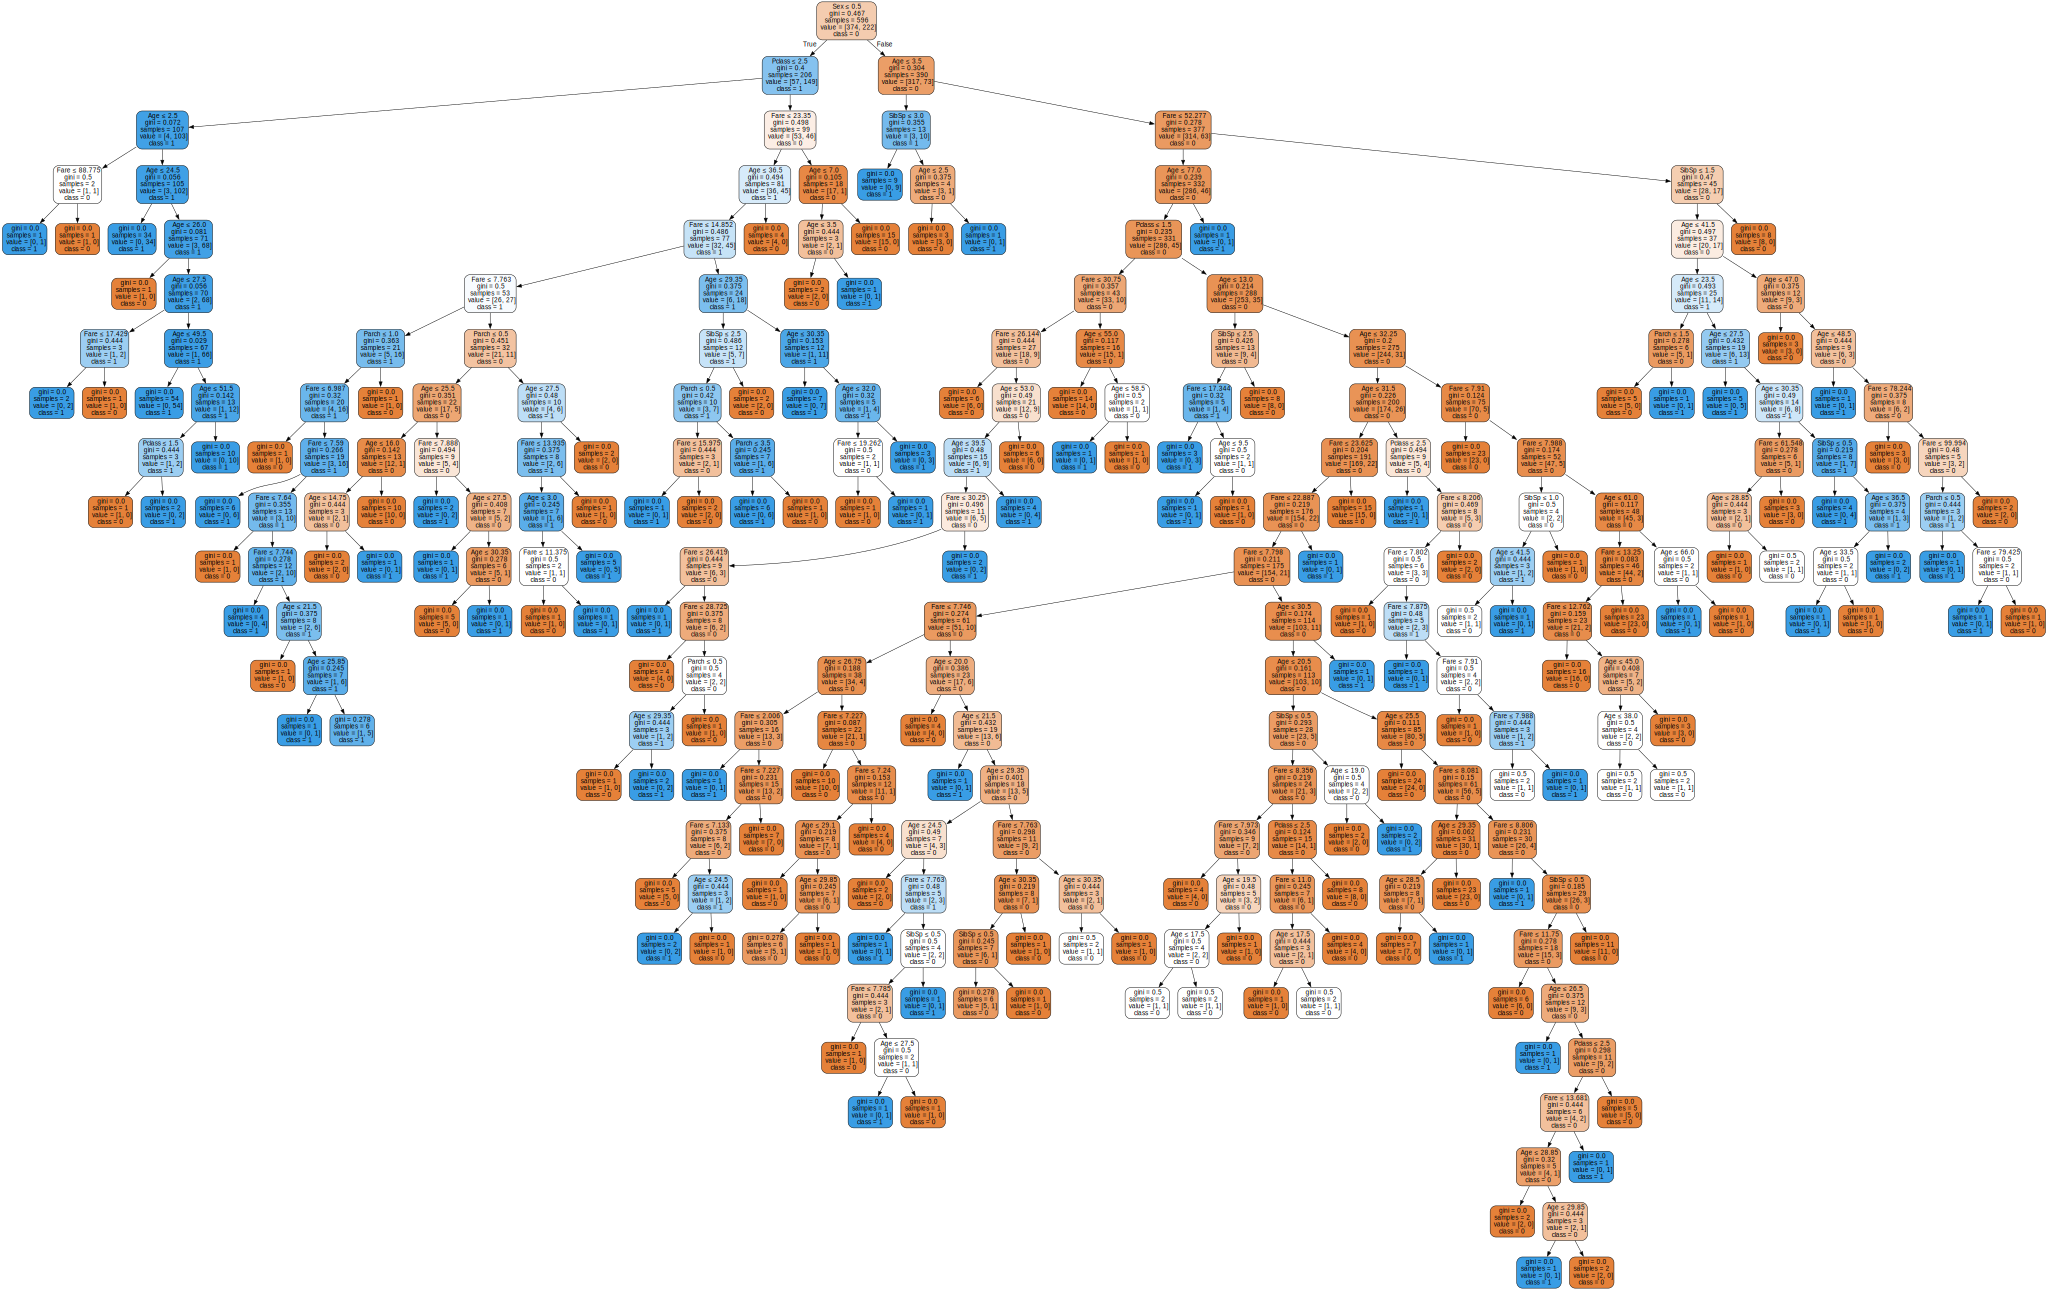

In [21]:
graph1

This is a very complex model, and if you zoom in you would see that in many leaves we have only 1 sample. this means that the model learned many complex rules to memorize the survival or death of each passenger in the training data.

Let's take Mr. Owen Harris (the first row of the training data), having such a complex model is similar to having a rule that says that if a passenger is in class 3, and is a male, and his age is more than 21, and his age is less than 23, and his fare is more than 7, and his fare is less than 8, and he has a sibling/spouse on board with him but no parents/children, then he would not survive. But this is obviously a rule that was tailor made to Mr Harris, and is equivalent to simply saying "Mr Harris did not survive", a rule that cannot be generalized to new unseen passengers who are not Mr Harris.

### Improve the model

We can reduce overfitting by limiting the number of "questions" that the model is allowed to ask. as each node in the tree is a question, by limiting the depth of the tree we can limit the number of questions. So let us again create an instance of a decision tree, but this one cannot produce trees deeper than 3 (3 questions):

In [22]:
model_improved = DecisionTreeClassifier(max_depth = 3)
model_improved.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [23]:
print('train score...' , accuracy_score(y_train, model_improved.predict(X_train)))
print('test score...', accuracy_score(y_test, model_improved.predict(X_test)))

train score... 0.8238255033557047
test score... 0.8203389830508474


We can see that while the train score went down, the test score has improved and it is now almost as high as the train score. This means that the model does not overfit as badly anymore. 82% accuracy with such a simple model is quite impressive in my opinion.

Let's visualize the tree again using the same code snippet from above:

In [24]:
dot_data= export_graphviz(model_improved, out_file=None,impurity=False,
feature_names=X_test.columns,
class_names=['0', '1'],
filled=True, rounded=True)

In [25]:
graph2=graphviz.Source(dot_data)

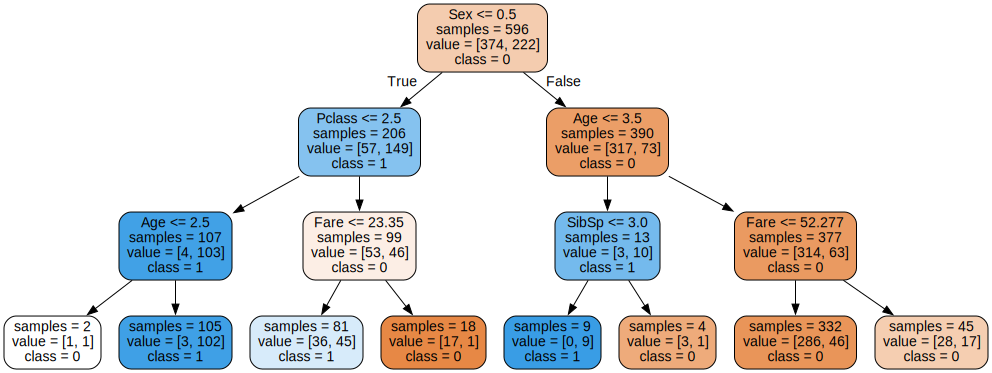

In [26]:
graph2

The training is the process of finding the most important features, and then use them to split the data. The training algorithm found that the most important features is the Sex. secondly, the class for females, and age for males. the bluer the block is, the higher the survival rate is, and opoositely with browner blocker.

To generate graph, use this url: http://www.webgraphviz.com/

The reference original reference link of this tutorial can be found here: https://www.kaggle.com/drgilermo/a-tutorial-for-complete-beginners